# ML Project: Creating the Dataset (Mortality Rate)

*Note: All datasets were updated in late October, early November.*

*At first, when updating, noticeable changes occurred. Instance count jumped from 50 to 60 to 75 within two weeks. Then, after about a month (early November), changes were insignificant and the number of countries reached its steady state with about 80 countries.*

We'll join multiple datasets on a common feature. The common feature is 'Country'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
cases_data=pd.read_csv("../COVID dataset/owid-covid-data3.csv")#covid latest 2
population_data=pd.read_csv("../COVID dataset/population.csv")
countries_data=pd.read_csv("../COVID dataset/countries of the world.csv")
usefulfeatures_data=pd.read_csv("../COVID dataset/countries useful features.csv")
GDP_data=pd.read_csv("../COVID dataset/GDP.csv")
HF_data=pd.read_csv("../COVID dataset/hf score.csv")
literacy1_data=pd.read_csv("../COVID dataset/literacy rate 1.csv")

In [4]:
cases_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80735 entries, 0 to 80734
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               80735 non-null  object 
 1   continent                              76804 non-null  object 
 2   location                               80735 non-null  object 
 3   date                                   80735 non-null  object 
 4   total_cases                            79092 non-null  float64
 5   new_cases                              79090 non-null  float64
 6   new_cases_smoothed                     78089 non-null  float64
 7   total_deaths                           69598 non-null  float64
 8   new_deaths                             69756 non-null  float64
 9   new_deaths_smoothed                    78089 non-null  float64
 10  total_cases_per_million                78663 non-null  float64
 11  ne

Select the desired feature from the datasets then join them. We chose population and density.

Make sure that the column 'Country' is written identicaly 

In [5]:
#population_data.info()

In [6]:
population_data=population_data.rename(columns={'Country (or dependency)':'Country','Density (P/Km²)':'Density','Population (2020)':'Population'})

population_data=population_data.filter(items=['Country','Population','Density'])

cases_data=cases_data.rename(columns={'location':'Country'})

cases_data=cases_data.filter(items=['date',
                                    'Country',
                                    'total_cases',
                                    'extreme_poverty',
                                    'human_development_index',
                                    'hospital_beds_per_thousand',
                                    'continent',
                                    'reproduction_rate',
                                    'total_deaths',
                                    'stringency_index',
                                    'median_age',
                                    'aged_70_older',
                                    'cardiovasc_death_rate',
                                    'diabetes_prevalence',
                                    'life_expectancy'])

result=population_data.join(cases_data.set_index('Country'), on='Country')

Change 'date' from object to datetime. datetime allows us to apply helpful operations of our date features

In [7]:
result['date'] = result['date'].apply(pd.to_datetime)

Only select countries where cases reached at least 1% of its population. 

Apply minimum function. Now the date when cases reached 1% is selected.

In [8]:
result = result.loc[result['date'] == "2021-03-29"]

In [9]:
result.isnull().sum()

Country                        0
Population                     0
Density                        0
date                           0
total_cases                    7
extreme_poverty               68
human_development_index       10
hospital_beds_per_thousand    26
continent                      0
reproduction_rate             13
total_deaths                  13
stringency_index              31
median_age                    11
aged_70_older                 12
cardiovasc_death_rate          9
diabetes_prevalence            6
life_expectancy                0
dtype: int64

In [10]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 234
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Country                     186 non-null    object        
 1   Population                  186 non-null    int64         
 2   Density                     186 non-null    int64         
 3   date                        186 non-null    datetime64[ns]
 4   total_cases                 179 non-null    float64       
 5   extreme_poverty             118 non-null    float64       
 6   human_development_index     176 non-null    float64       
 7   hospital_beds_per_thousand  160 non-null    float64       
 8   continent                   186 non-null    object        
 9   reproduction_rate           173 non-null    float64       
 10  total_deaths                173 non-null    float64       
 11  stringency_index            155 non-null    float64       

In [18]:
result = result.drop(axis = 0, labels = list(result.loc[result['total_cases'].isnull()].index))
result = result.drop(axis = 0, labels = list(result.loc[result['total_deaths'].isnull()].index))

In [19]:
result=result.set_index('Country')

result['mortality_rate'] = result['total_deaths']/result['total_cases']

result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, Afghanistan to Zimbabwe
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Population                  173 non-null    int64         
 1   Density                     173 non-null    int64         
 2   date                        173 non-null    datetime64[ns]
 3   total_cases                 173 non-null    float64       
 4   extreme_poverty             115 non-null    float64       
 5   human_development_index     169 non-null    float64       
 6   hospital_beds_per_thousand  156 non-null    float64       
 7   continent                   173 non-null    object        
 8   reproduction_rate           172 non-null    float64       
 9   total_deaths                173 non-null    float64       
 10  stringency_index            149 non-null    float64       
 11  median_age                  169 non-null    floa

Join with the next dataset (countries_data). We'll select 'Climate' from this dataset.

Note: We applied str.strip() to remove spaces from the begining and end of the country column. This dataset (countries of the world) has a space at the begining of each country. To correctly join them the 'Country' column has to be identical. 

In [20]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [21]:
result=result.reset_index()

countries_data=countries_data.filter(items=['Country','Region','Climate'])
countries_data['Country']=countries_data['Country'].str.strip()

We noticed that we don't need the feature 'Region' as we'll be using 'continent' from another dataset.

Drop features with NULL climate.

In [22]:
countries_data=countries_data.dropna(subset=["Climate"])
countries_data=countries_data.reset_index(drop=True)

countries_data.drop('Region',axis='columns', inplace=True)

countriesData=result.set_index('Country').join(countries_data.set_index('Country'))

Join with the next dataset (useful features data). 

We'll select Tourism, Date of first case, Latitude, Longitude, Lockdown date, and Lockdown type.

In [23]:
usefulfeatures_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country_Region           184 non-null    object 
 1   Population_Size          184 non-null    int64  
 2   Tourism                  184 non-null    int64  
 3   Date_FirstFatality       156 non-null    object 
 4   Date_FirstConfirmedCase  184 non-null    object 
 5   Latitude                 184 non-null    float64
 6   Longtitude               184 non-null    float64
 7   Mean_Age                 184 non-null    float64
 8   Lockdown_Date            151 non-null    object 
 9   Lockdown_Type            151 non-null    object 
 10  Country_Code             184 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 15.9+ KB


In [24]:
countriesData=countriesData.reset_index()

usefulfeatures_data=usefulfeatures_data.filter(items=['Country_Region','Tourism','Date_FirstConfirmedCase','Latitude','Longtitude','Lockdown_Date','Lockdown_Type'])
usefulfeatures_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country_Region           184 non-null    object 
 1   Tourism                  184 non-null    int64  
 2   Date_FirstConfirmedCase  184 non-null    object 
 3   Latitude                 184 non-null    float64
 4   Longtitude               184 non-null    float64
 5   Lockdown_Date            151 non-null    object 
 6   Lockdown_Type            151 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 10.2+ KB


Change date from object to datetime

In [25]:
usefulfeatures_data=usefulfeatures_data.rename(columns={'Country_Region':'Country'})

usefulfeatures_data['Lockdown_Date']=usefulfeatures_data['Lockdown_Date'].apply(pd.to_datetime)
usefulfeatures_data['Date_FirstConfirmedCase']=usefulfeatures_data['Date_FirstConfirmedCase'].apply(pd.to_datetime)

countriesData=countriesData.set_index('Country').join(usefulfeatures_data.set_index('Country'))

Rename the date column. Drop total cases, we don't need it.

In [26]:
countriesData=countriesData.reset_index()

#countriesData=countriesData.rename(columns={'date':'Date to reach 1%'})

#countriesData=countriesData.drop(['total_cases'], axis=1)

Join the next dataset (GDP). We'll use the feature GDP from this dataset.

In [27]:
GDP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       260 non-null    object 
 1   Country Code  260 non-null    object 
 2   1990          209 non-null    float64
 3   1991          211 non-null    float64
 4   1992          213 non-null    float64
 5   1993          215 non-null    float64
 6   1994          218 non-null    float64
 7   1995          224 non-null    float64
 8   1996          224 non-null    float64
 9   1997          225 non-null    float64
 10  1998          226 non-null    float64
 11  1999          227 non-null    float64
 12  2000          236 non-null    float64
 13  2001          237 non-null    float64
 14  2002          238 non-null    float64
 15  2003          238 non-null    float64
 16  2004          238 non-null    float64
 17  2005          238 non-null    float64
 18  2006          238 non-null    

In [28]:
GDP_data=GDP_data.filter(items=['Country ','2017','2018'])

GDP_data=GDP_data.rename(columns={'Country ':'Country'})

From the GDP dataset, we'll be using values collected from 2018. Some 2018 values are null so fill them with older 2017 GDP values.

Then, drop 2017 GDP column as we don't need it anymore

In [29]:
GDP_data['2018']=GDP_data['2018'].fillna(GDP_data['2017'])

GDP_data=GDP_data.drop(['2017'], axis=1)

GDP_data=GDP_data.rename(columns={'2018':'GDP 2018'})

countriesData=countriesData.set_index('Country').join(GDP_data.set_index('Country'))

Join the next dataset (HF data). We'll select the human freedom score from this dataset.

In [30]:
HF_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Columns: 120 entries, year to ef_rank
dtypes: float64(43), int64(13), object(64)
memory usage: 152.0+ KB


In [31]:
HF_data=HF_data.filter(items=['countries','hf_score'])

HF_data=HF_data.rename(columns={'countries':'Country','hf_score':'HF score 2017'})

countriesData=countriesData.reset_index()

countriesData=countriesData.set_index('Country').join(HF_data.set_index('Country'))

In [32]:
countriesData=countriesData.reset_index()
countriesData=countriesData.reset_index()

Join the next dataset (literacy data). We selected the average literacy rate.

In [33]:
literacy1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          150 non-null    object 
 1    literacy_rate_percent_all       150 non-null    object 
 2    male_literacy_percent_rate      150 non-null    float64
 3    female_literacy_percent_rate    150 non-null    float64
 4    gender_difference_percentWorld  150 non-null    float64
 5   86.3                             1 non-null      float64
 6   90.0                             0 non-null      float64
 7   82.7                             0 non-null      float64
 8   7.3	                             0 non-null      float64
dtypes: float64(7), object(2)
memory usage: 10.7+ KB


In [34]:
literacy1_data=literacy1_data.filter(items=['country',' literacy_rate_percent_all'])

literacy1_data=literacy1_data.rename(columns={'country':'Country',' literacy_rate_percent_all':'literacy rate'})

countriesData=countriesData.set_index('Country').join(literacy1_data.set_index('Country'), on='Country')

countriesData=countriesData.reset_index()

In [36]:
#countriesData = countriesData.drop(axis=0, labels = [142,152])
countriesData = countriesData.drop(axis=0, labels = countriesData.loc[countriesData.isnull().sum(axis=1)>10].index)

We now have our dataset ready! 

Save it in the project repository.

In [37]:
countriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Country                     172 non-null    object        
 1   index                       172 non-null    int64         
 2   Population                  172 non-null    int64         
 3   Density                     172 non-null    int64         
 4   date                        172 non-null    datetime64[ns]
 5   total_cases                 172 non-null    float64       
 6   extreme_poverty             115 non-null    float64       
 7   human_development_index     169 non-null    float64       
 8   hospital_beds_per_thousand  156 non-null    float64       
 9   continent                   172 non-null    object        
 10  reproduction_rate           171 non-null    float64       
 11  total_deaths                172 non-null    float64       

(array([111.,  51.,   6.,   2.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00049734, 0.02141966, 0.04234198, 0.0632643 , 0.08418662,
        0.10510894, 0.12603126, 0.14695358, 0.1678759 , 0.18879822,
        0.20972053]),
 <BarContainer object of 10 artists>)

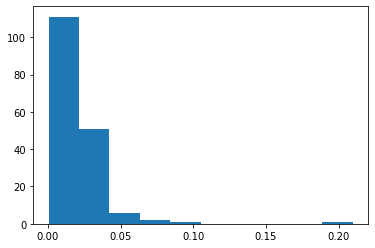

In [38]:
plt.hist(countriesData['mortality_rate'])

In [42]:
countriesData = countriesData.drop(axis=0, labels = countriesData.loc[countriesData['mortality_rate']>=0.15].index) #drop yemen

In [43]:
countriesData.loc[countriesData['Country']=='Yemen']

,Country,index,Population,Density,date,total_cases,extreme_poverty,human_development_index,hospital_beds_per_thousand,continent,...,Climate,Tourism,Date_FirstConfirmedCase,Latitude,Longtitude,Lockdown_Date,Lockdown_Type,GDP 2018,HF score 2017,literacy rate


(array([33., 64., 39., 17., 11.,  3.,  1.,  2.,  0.,  1.]),
 array([0.00049734, 0.00950713, 0.01851692, 0.02752671, 0.0365365 ,
        0.0455463 , 0.05455609, 0.06356588, 0.07257567, 0.08158546,
        0.09059525]),
 <BarContainer object of 10 artists>)

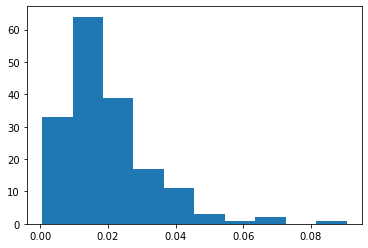

In [44]:
plt.hist(countriesData['mortality_rate'])

In [45]:
countriesData['mortality_rate'].describe()

count    171.000000
mean       0.019771
std        0.013489
min        0.000497
25%        0.010832
50%        0.017116
75%        0.025895
max        0.090595
Name: mortality_rate, dtype: float64

In [46]:
#Filter to only take stable countries
countriesData = countriesData.loc[countriesData['total_cases']>=0.05*countriesData['Population']]

In [47]:
#Filter to only take countries with high freedom index
countriesData = countriesData.loc[countriesData['HF score 2017']>6.5]

In [48]:
#Filter to only take countries with high developement
countriesData = countriesData.loc[countriesData['human_development_index']>0.8]

In [53]:
countriesData.to_csv('mortality.csv',index=False)

In [51]:
countriesData.iloc[6]#6 1

Country                                   Estonia
index                                          50
Population                                1326693
Density                                        31
date                          2021-03-29 00:00:00
total_cases                              104214.0
extreme_poverty                               0.5
human_development_index                     0.892
hospital_beds_per_thousand                   4.69
continent                                  Europe
reproduction_rate                            0.83
total_deaths                                879.0
stringency_index                            61.11
median_age                                   42.7
aged_70_older                              13.491
cardiovasc_death_rate                     255.569
diabetes_prevalence                          4.02
life_expectancy                             78.74
mortality_rate                           0.008435
Climate                                       3.0


<AxesSubplot:>

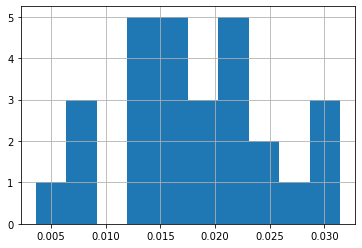

In [52]:
countriesData['mortality_rate'].hist()

In [50]:
countriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 6 to 165
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Country                     28 non-null     object        
 1   index                       28 non-null     int64         
 2   Population                  28 non-null     int64         
 3   Density                     28 non-null     int64         
 4   date                        28 non-null     datetime64[ns]
 5   total_cases                 28 non-null     float64       
 6   extreme_poverty             21 non-null     float64       
 7   human_development_index     28 non-null     float64       
 8   hospital_beds_per_thousand  28 non-null     float64       
 9   continent                   28 non-null     object        
 10  reproduction_rate           28 non-null     float64       
 11  total_deaths                28 non-null     float64       
